In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# GENERAL PLOT OPTIONS
# GENERAL PLOT OPTIONS
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
matplotlib.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
matplotlib.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'
matplotlib.rcParams['xtick.bottom'] = True
matplotlib.rcParams['xtick.labelsize'] = 18
matplotlib.rcParams['xtick.top'] = False
matplotlib.rcParams['ytick.right'] = False
matplotlib.rcParams['ytick.labelsize'] = 18
matplotlib.rcParams['ytick.major.size'] = 6
matplotlib.rcParams['ytick.major.width'] = 1.2
matplotlib.rcParams['ytick.minor.size'] = 3
matplotlib.rcParams['ytick.minor.width'] = 0.8
matplotlib.rcParams['axes.edgecolor'] = 'black'
matplotlib.rcParams['axes.linewidth'] = '1.0'
matplotlib.rcParams['axes.labelsize'] = 18
matplotlib.rcParams['axes.titlesize'] = 24
matplotlib.rcParams['axes.grid'] = True
matplotlib.rcParams['grid.linewidth'] = '0.0'
matplotlib.rcParams['grid.alpha'] = '0.18'
matplotlib.rcParams['grid.color'] = 'lightgray'
matplotlib.rcParams['legend.labelspacing'] = 0.77
matplotlib.rcParams['legend.fontsize'] = 14
matplotlib.rcParams['legend.title_fontsize'] = 18
matplotlib.rcParams['savefig.bbox'] = 'tight'
matplotlib.rcParams['savefig.format'] = 'pdf'
matplotlib.rcParams['savefig.dpi'] = 300

from scipy.interpolate import interp1d
from scipy.integrate import quad

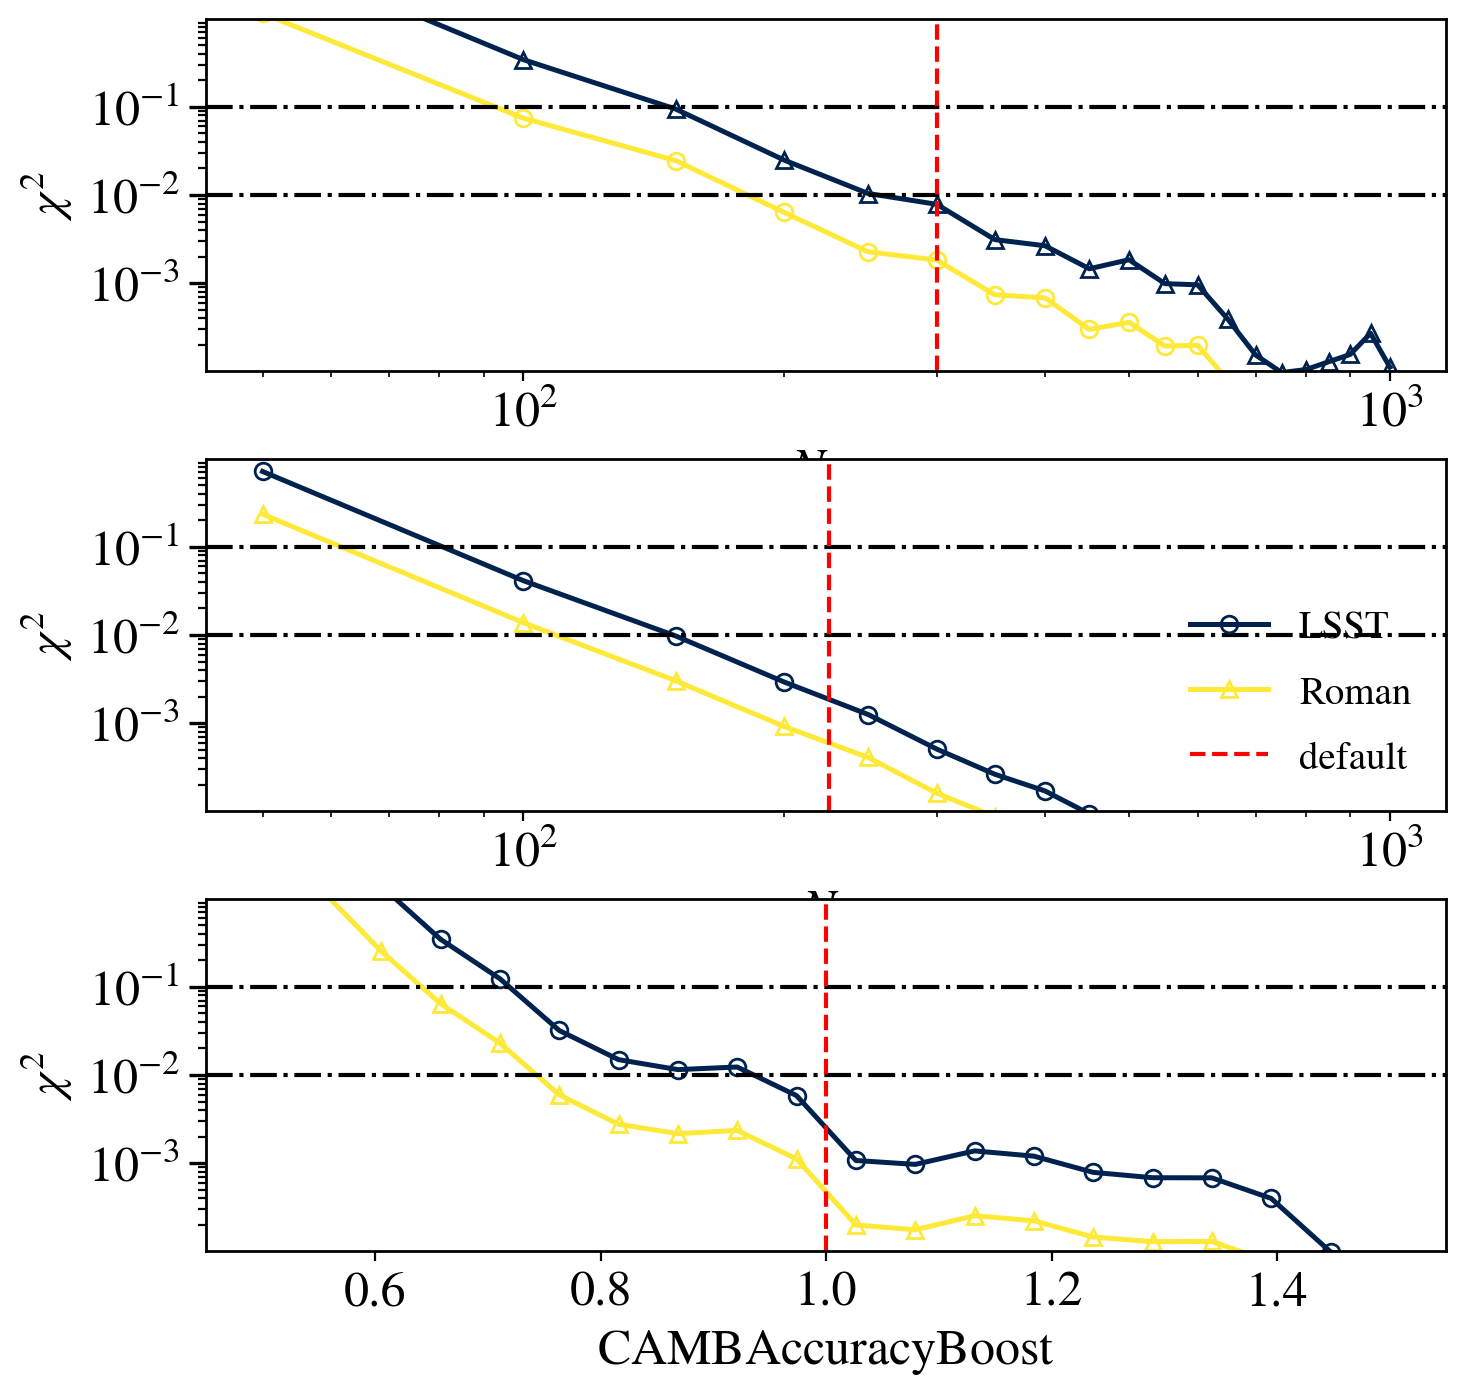

In [34]:
import itertools
def make_style_iter():
    linestyles = ['-', '--', '-.', ':']
    #markers    = ['o', 's', '^', 'D', 'v', 'P', 'X', '*']
    markers = ['o', '^', '*']
    linewidths = [1.8, 2.6]
    return itertools.cycle(itertools.product(linewidths, linestyles, markers, ))

cmap = plt.get_cmap("cividis")
colors = cmap(np.arange(0, 2)/1)

def plot_assemble(axs, x, y, legend, color,ls,mk,lw):
    (ln, ) = axs.plot(x, y,markersize=6.0,color=color,label=legend,linestyle=ls,linewidth=lw,marker=mk,markerfacecolor='none')
    axs.axhline(xmin=0,xmax=1,y=0.0,color='k',linestyle='-')
    return ln

fig,axs = plt.subplots(3,1,figsize=(8,8))
plt.subplots_adjust(hspace=0.25)
ymin = 1e-4
ymax = 1e0

#subplot1
chi2s_lsst = np.loadtxt('./data/lsst_real/chi2s_NCl.txt')
chi2s_roman = np.loadtxt('./data/roman_real/chi2s_NCl.txt')
styles = make_style_iter()
ln= plot_assemble(axs[0], chi2s_lsst[:,0], chi2s_lsst[:,1], legend='LSST', color=colors[0], ls=ls, mk=mk, lw=lw)
lw,ls,mk = next(styles)
ln= plot_assemble(axs[0], chi2s_roman[:,0], chi2s_roman[:,1], legend='Roman', color=colors[1], ls=ls, mk=mk, lw=lw)

#subplot2
chi2s_lsst = np.loadtxt('./data/lsst_real/chi2s_Na.txt')
chi2s_roman = np.loadtxt('./data/roman_real/chi2s_Na.txt')
styles = make_style_iter()
lines = []
lw,ls,mk = next(styles)
ln= plot_assemble(axs[1], chi2s_lsst[:,0], chi2s_lsst[:,1], legend='LSST', color=colors[0], ls=ls, mk=mk, lw=lw)
lines.append(ln)
lw,ls,mk = next(styles)
ln= plot_assemble(axs[1], chi2s_roman[:,0], chi2s_roman[:,1], legend='Roman', color=colors[1], ls=ls, mk=mk, lw=lw)
lines.append(ln)


#subplot3
chi2s_lsst = np.loadtxt('./data/lsst_real/chi2s_CAMBAB.txt')
chi2s_roman = np.loadtxt('./data/roman_real/chi2s_CAMBAB.txt')
styles = make_style_iter()
lw,ls,mk = next(styles)
ln= plot_assemble(axs[2], chi2s_lsst[:,0], chi2s_lsst[:,1], legend='LSST', color=colors[0], ls=ls, mk=mk, lw=lw)
lw,ls,mk = next(styles)
ln= plot_assemble(axs[2], chi2s_roman[:,0], chi2s_roman[:,1], legend='Roman', color=colors[1], ls=ls, mk=mk, lw=lw)

#----------------------------------
for i in range(3):
    axs[i].set_ylim(ymin*1.01, ymax*0.99)
    axs[i].axhline(xmin=0, xmax=1, y=1e-1, linestyle='-.', color='k')
    axs[i].axhline(xmin=0, xmax=1, y=1e-2, linestyle='-.', color='k')
    axs[i].set_yscale('log')
    axs[i].set_ylabel(r'$\chi^2$')

axs[0].axvline(ymin=0, ymax=1, x=300, linestyle='--', color='r', label='default')
axs[0].set_xlabel(r'$N_{C_\ell}$')
axs[0].set_xscale('log')


ln=axs[1].axvline(ymin=0, ymax=1, x=225, linestyle='--', color='r', label='default')
lines.append(ln)
axs[1].legend(handles=lines, frameon=False)
axs[1].set_xlabel(r'$N_a$')
axs[1].set_xscale('log')

axs[2].axvline(ymin=0, ymax=1, x=1.0, linestyle='--', color='r', label='default')
axs[2].set_xlabel(r'$\mathrm{CAMB} \mathrm{AccuracyBoost}$')

plt.savefig('./accuracy_settings.png', dpi=300)